In [ ]:
#importing the API's
import cv2 as cv
from google.colab.patches import cv2_imshow
import skimage.color
import skimage.io
from skimage.filters import gaussian, gabor, gabor_kernel, threshold_otsu
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1. Create a DoG filter to emulate lateral inhibition. Apply it on the images and see the results. Experiment with different values of the parameters.


In [ ]:
#finding the difference of gaussian
def difference_of_gaussian(image, low_sigma, high_sigma=None, *, mode='nearest', cval=0, channel_axis=None, truncate=4.0, multichannel=False):
  image = image.astype(float)
  spatial_dims = image.ndim
  low_sigma = np.array(low_sigma, dtype='float', ndmin=1) * np.ones(spatial_dims)
  high_sigma = np.array(high_sigma, dtype='float', ndmin=1) * np.ones(spatial_dims)
  image = gaussian(image, low_sigma, mode=mode, cval=cval, multichannel=multichannel, truncate=truncate) - gaussian(image, high_sigma, mode=mode, cval=cval, multichannel=multichannel, truncate=truncate)
  min = np.amin(image)
  return image - min #removing the negative weight pixels

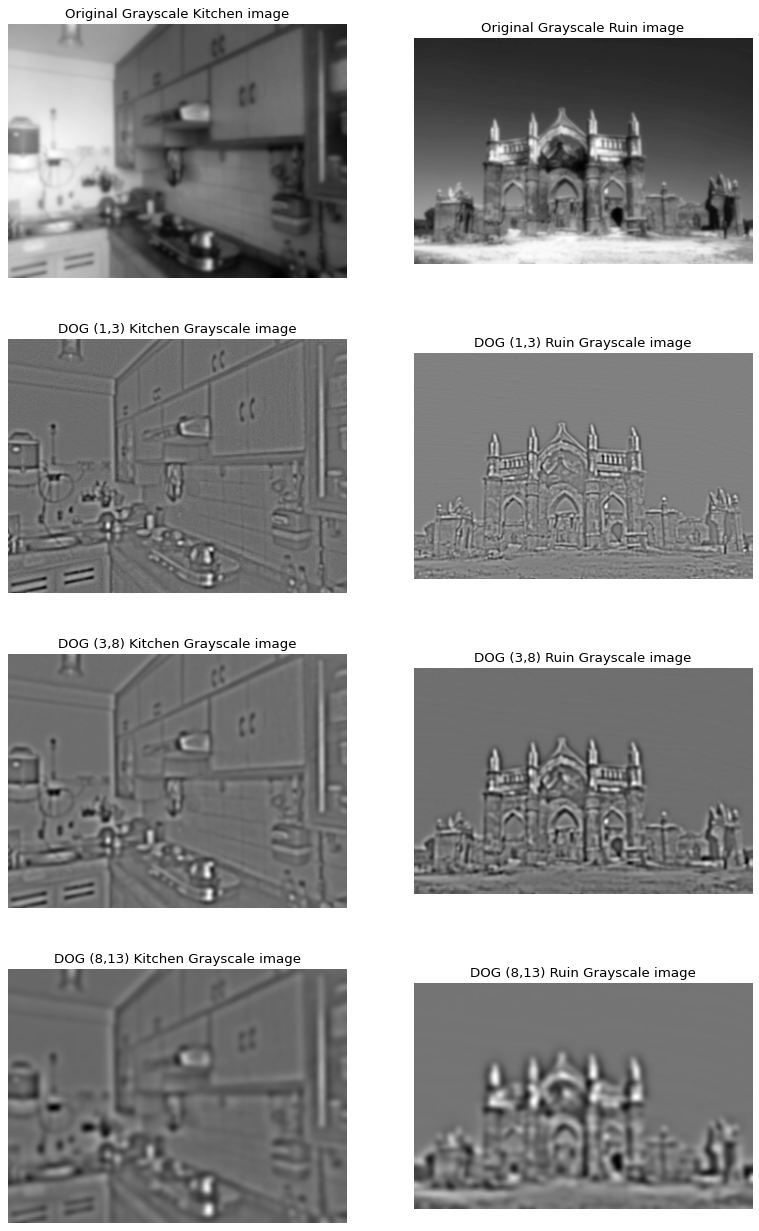

In [ ]:
plt.figure(figsize=(12, 20), dpi=80)

img = cv.imread('/content/drive/MyDrive/PBV/Assignment-1/Kitchen.jpg')  #reading the Kitchen image
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #coverting the image to grayscale
img = img.astype(float) # converting the image value to float type
plt.subplot(4,2,1)
plt.title('Original Grayscale Kitchen image')
plt.imshow(img, cmap='gray') 
plt.axis('off')

dog_kitchen_1 = difference_of_gaussian(image=img, low_sigma=1, high_sigma=3) #find the difference of gaussian with low sigma 1 and high sigma 3 for kitchen image
plt.subplot(4,2,3)
plt.title('DOG (1,3) Kitchen Grayscale image')
plt.imshow(dog_kitchen_1, cmap='gray')
plt.axis('off')

dog_kitchen_2 = difference_of_gaussian(image=img, low_sigma=3, high_sigma=8) #find the difference of gaussian with low sigma 3 and high sigma 8 for kitchen image
plt.subplot(4,2,5)
plt.title('DOG (3,8) Kitchen Grayscale image')
plt.imshow(dog_kitchen_2, cmap='gray')
plt.axis('off')

dog_kitchen_3 = difference_of_gaussian(image=img, low_sigma=8, high_sigma=13) #find the difference of gaussian with low sigma 8 and high sigma 13 for kitchen image
plt.subplot(4,2,7)
plt.title('DOG (8,13) Kitchen Grayscale image')
plt.imshow(dog_kitchen_3, cmap='gray')
plt.axis('off')




img2=cv.imread('/content/drive/MyDrive/PBV/Assignment-1/Ruin.jpg') #reading the Ruin Image
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY) #coverting the image to grayscale
img2 = img2.astype(float)  # converting the image value to float type

plt.subplot(4,2,2)
plt.title('Original Grayscale Ruin image')
plt.imshow(img2, cmap='gray')
plt.axis('off')

dog_ruin_1 = difference_of_gaussian(image=img2, low_sigma=1, high_sigma=3) #find the difference of gaussian with low sigma 1 and high sigma 3 for ruin image
plt.subplot(4,2,4)
plt.title('DOG (1,3) Ruin Grayscale image')
plt.imshow(dog_ruin_1, cmap='gray')
plt.axis('off')

dog_ruin_2 = difference_of_gaussian(image=img2, low_sigma=3, high_sigma=8) #find the difference of gaussian with low sigma 3 and high sigma 8 for ruin image
plt.subplot(4,2,6)
plt.title('DOG (3,8) Ruin Grayscale image')
plt.imshow(dog_ruin_2, cmap='gray')
plt.axis('off')

dog_ruin_3 = difference_of_gaussian(image=img2, low_sigma=8, high_sigma=15) #find the difference of gaussian with low sigma 8 and high sigma 13 for ruin image
plt.subplot(4,2,8)
plt.title('DOG (8,13) Ruin Grayscale image')
plt.imshow(dog_ruin_3, cmap='gray')

plt.axis('off')
plt.show()



Step 2. Create oriented filters (0⁰, 45⁰, 90⁰, 135⁰) to detect oriented edges on the DoG filtered image. Examine the edge images

In [ ]:
def orientedFilters(img, theta): #find the oriented edges of the DOG images
  pi=3.14159
  theta=theta*pi/180 #converting degrees to radians
  real_value, imaginary_value = gabor(img, frequency=0.1,bandwidth=1, theta=theta) #finding the theta radians edges in the image using gabor filter
  #real_value = real_value-np.amin(real_value)
  return real_value , imaginary_value

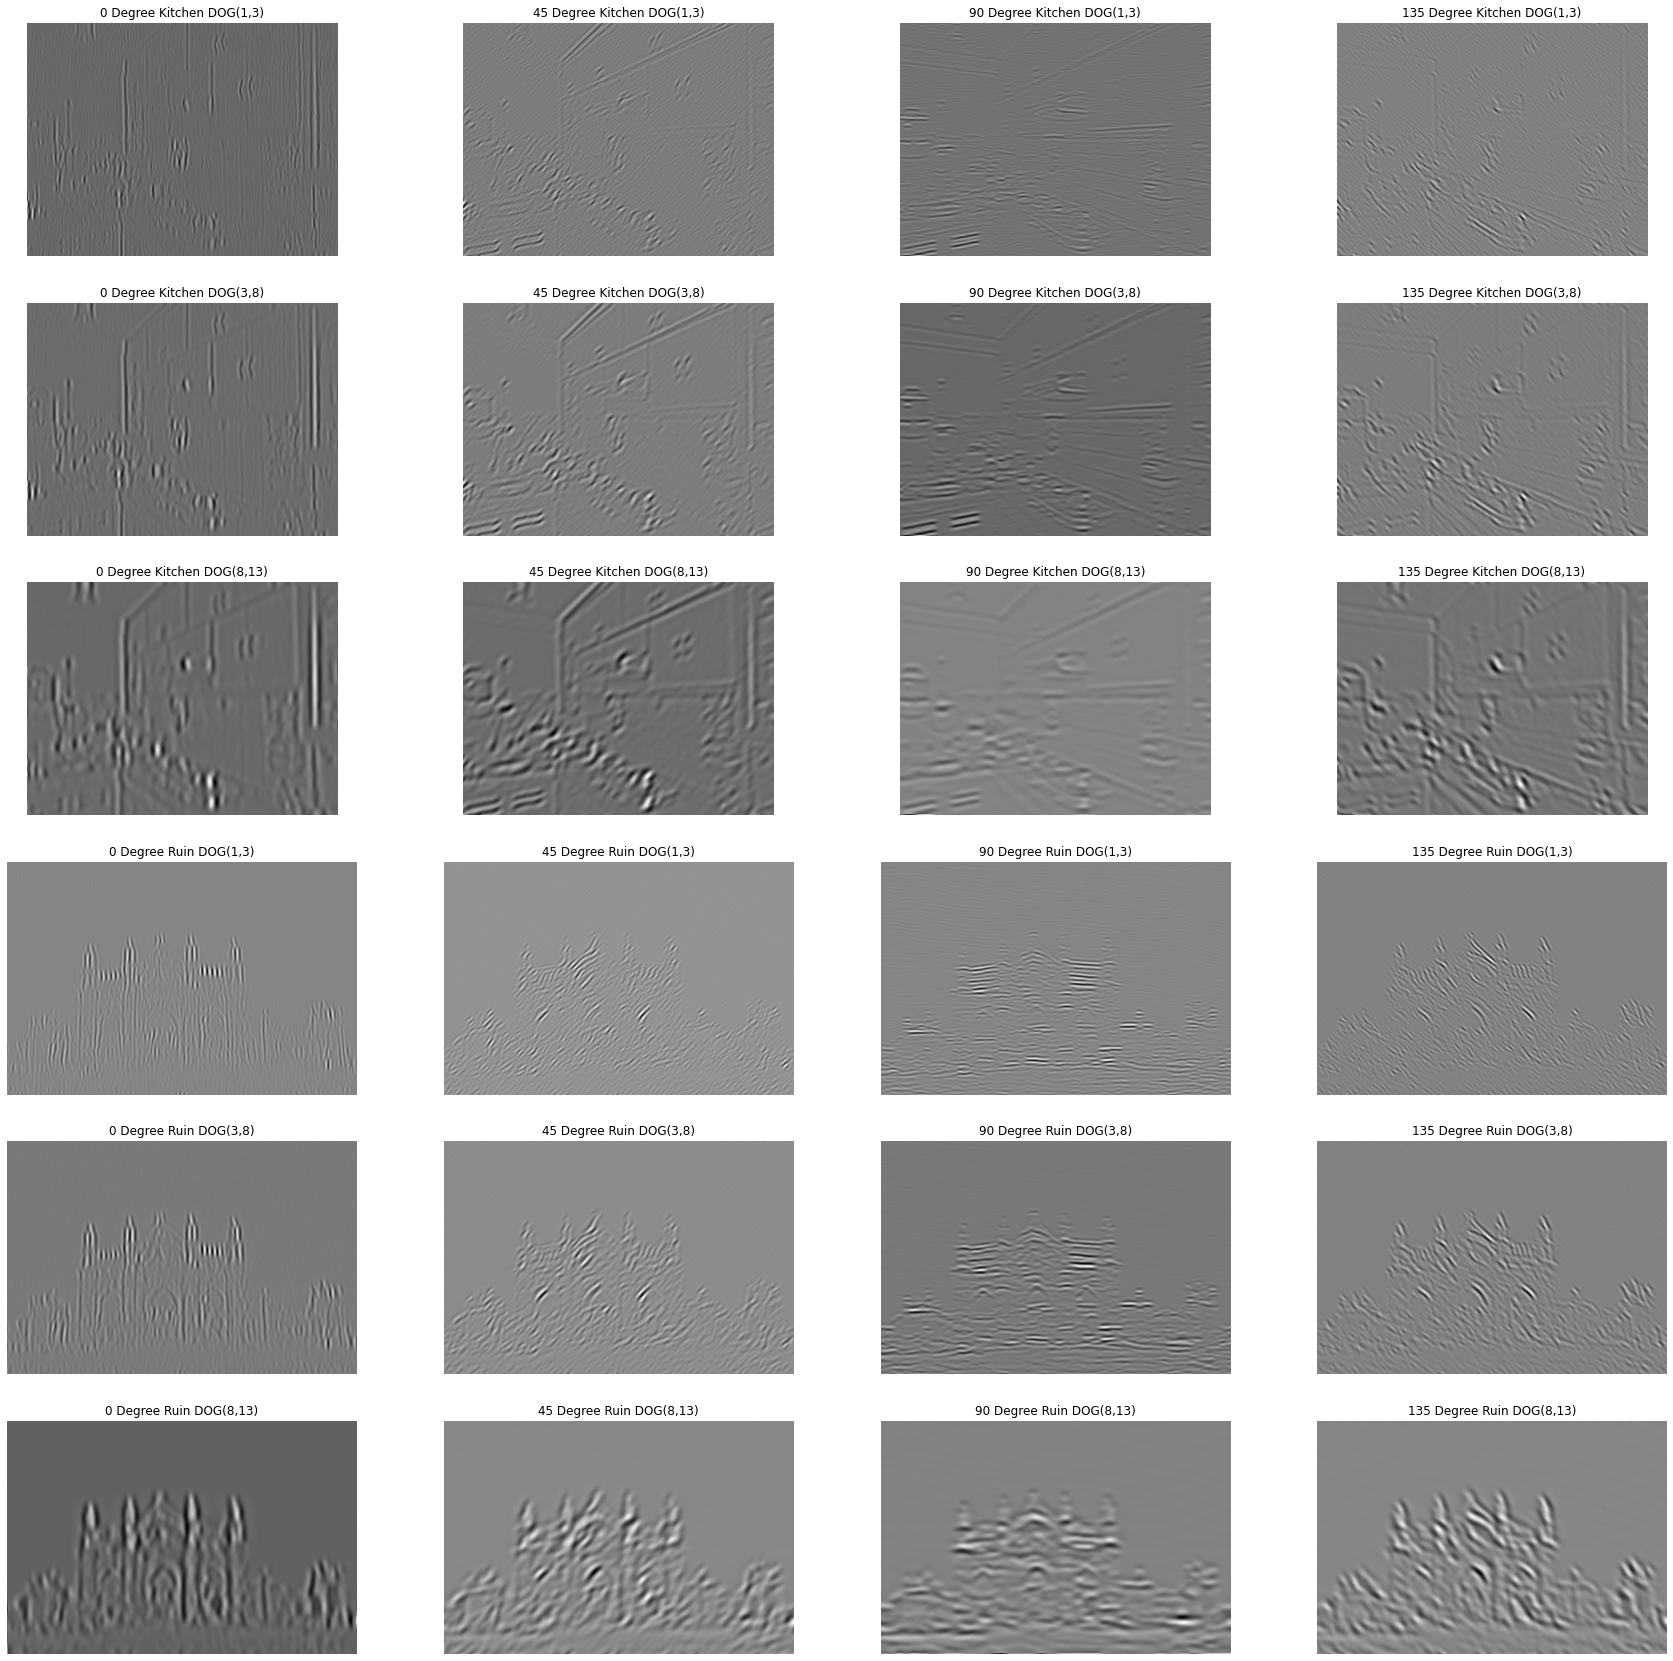

In [ ]:
plt.figure(figsize=(30, 30))

# finding 0,45,90,135 degree oriented edges for kitchen image with dog(1,3)
orien_dog_kitchen_1_0, orien_dog_kitchen_1_0_i = orientedFilters(dog_kitchen_1, 0) 
orien_dog_kitchen_1_45, orien_dog_kitchen_1_45_i = orientedFilters(dog_kitchen_1, 45)
orien_dog_kitchen_1_90, orien_dog_kitchen_1_90_i = orientedFilters(dog_kitchen_1, 90)
orien_dog_kitchen_1_135, orien_dog_kitchen_1_135_i = orientedFilters(dog_kitchen_1, 135)

# finding 0,45,90,135 degree oriented edges for kitchen image with dog(3,8)
orien_dog_kitchen_2_0, orien_dog_kitchen_2_0_i = orientedFilters(dog_kitchen_2, 0)
orien_dog_kitchen_2_45, orien_dog_kitchen_2_45_i = orientedFilters(dog_kitchen_2, 45)
orien_dog_kitchen_2_90, orien_dog_kitchen_2_90_i = orientedFilters(dog_kitchen_2, 90)
orien_dog_kitchen_2_135, orien_dog_kitchen_2_135_i = orientedFilters(dog_kitchen_2, 135)

# finding 0,45,90,135 degree oriented edges for kitchen image with dog(8,13)
orien_dog_kitchen_3_0, orien_dog_kitchen_3_0_i = orientedFilters(dog_kitchen_3, 0)
orien_dog_kitchen_3_45, orien_dog_kitchen_3_45_i = orientedFilters(dog_kitchen_3, 45)
orien_dog_kitchen_3_90, orien_dog_kitchen_3_90_i = orientedFilters(dog_kitchen_3, 90)
orien_dog_kitchen_3_135, orien_dog_kitchen_3_135_i = orientedFilters(dog_kitchen_3, 135)

# Plotting the images
plt.subplot(6,4,1)      
plt.title('0 Degree Kitchen DOG(1,3)')  
plt.imshow(orien_dog_kitchen_1_0, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,2)   
plt.title('45 Degree Kitchen DOG(1,3)')       
plt.imshow(orien_dog_kitchen_1_45, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,3) 
plt.title('90 Degree Kitchen DOG(1,3)')         
plt.imshow(orien_dog_kitchen_1_90, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,4) 
plt.title('135 Degree Kitchen DOG(1,3)')         
plt.imshow(orien_dog_kitchen_1_135, cmap='gray')
plt.axis('off') 

plt.subplot(6,4,5)  
plt.title('0 Degree Kitchen DOG(3,8)')       
plt.imshow(orien_dog_kitchen_2_0, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,6)  
plt.title('45 Degree Kitchen DOG(3,8)')       
plt.imshow(orien_dog_kitchen_2_45, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,7)   
plt.title('90 Degree Kitchen DOG(3,8)')      
plt.imshow(orien_dog_kitchen_2_90, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,8) 
plt.title('135 Degree Kitchen DOG(3,8)')        
plt.imshow(orien_dog_kitchen_2_135, cmap='gray') 
plt.axis('off')

plt.subplot(6,4,9)        
plt.title('0 Degree Kitchen DOG(8,13)')
plt.imshow(orien_dog_kitchen_3_0, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,10)    
plt.title('45 Degree Kitchen DOG(8,13)')    
plt.imshow(orien_dog_kitchen_3_45, cmap='gray')
plt.axis('off') 
plt.subplot(6,4,11) 
plt.title('90 Degree Kitchen DOG(8,13)')       
plt.imshow(orien_dog_kitchen_3_90, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,12)  
plt.title('135 Degree Kitchen DOG(8,13)')      
plt.imshow(orien_dog_kitchen_3_135, cmap='gray') 
plt.axis('off')




# finding 0,45,90,135 degree oriented edges for ruin image with dog(1,3)
orien_dog_ruin_1_0, orien_dog_ruin_1_0_i = orientedFilters(dog_ruin_1, 0)
orien_dog_ruin_1_45, orien_dog_ruin_1_45_i = orientedFilters(dog_ruin_1, 45)
orien_dog_ruin_1_90, orien_dog_ruin_1_90_i = orientedFilters(dog_ruin_1, 90)
orien_dog_ruin_1_135, orien_dog_ruin_1_135_i = orientedFilters(dog_ruin_1, 135)

# finding 0,45,90,135 degree oriented edges for ruin image with dog(3,8)
orien_dog_ruin_2_0, orien_dog_ruin_2_0_i = orientedFilters(dog_ruin_2, 0)
orien_dog_ruin_2_45, orien_dog_ruin_2_45_i = orientedFilters(dog_ruin_2, 45)
orien_dog_ruin_2_90, orien_dog_ruin_2_90_i = orientedFilters(dog_ruin_2, 90)
orien_dog_ruin_2_135, orien_dog_ruin_2_135_i = orientedFilters(dog_ruin_2, 135)

# finding 0,45,90,135 degree oriented edges for ruin image with dog(8,13)
orien_dog_ruin_3_0, orien_dog_ruin_3_0_i = orientedFilters(dog_ruin_3, 0)
orien_dog_ruin_3_45, orien_dog_ruin_3_45_i = orientedFilters(dog_ruin_3, 45)
orien_dog_ruin_3_90, orien_dog_ruin_3_90_i = orientedFilters(dog_ruin_3, 90)
orien_dog_ruin_3_135, orien_dog_ruin_3_135_i = orientedFilters(dog_ruin_3, 135)

# Plotting the images
plt.subplot(6,4,13)      
plt.title('0 Degree Ruin DOG(1,3)')  
plt.imshow(orien_dog_ruin_1_0, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,14)   
plt.title('45 Degree Ruin DOG(1,3)')       
plt.imshow(orien_dog_ruin_1_45, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,15) 
plt.title('90 Degree Ruin DOG(1,3)')         
plt.imshow(orien_dog_ruin_1_90, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,16) 
plt.title('135 Degree Ruin DOG(1,3)')         
plt.imshow(orien_dog_ruin_1_135, cmap='gray')
plt.axis('off') 

plt.subplot(6,4,17)  
plt.title('0 Degree Ruin DOG(3,8)')       
plt.imshow(orien_dog_ruin_2_0, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,18)  
plt.title('45 Degree Ruin DOG(3,8)')       
plt.imshow(orien_dog_ruin_2_45, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,19)   
plt.title('90 Degree Ruin DOG(3,8)')      
plt.imshow(orien_dog_ruin_2_90, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,20) 
plt.title('135 Degree Ruin DOG(3,8)')        
plt.imshow(orien_dog_ruin_2_135, cmap='gray') 
plt.axis('off')

plt.subplot(6,4,21)        
plt.title('0 Degree Ruin DOG(8,13)')
plt.imshow(orien_dog_ruin_3_0, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,22)    
plt.title('45 Degree Ruin DOG(8,13)')    
plt.imshow(orien_dog_ruin_3_45, cmap='gray')
plt.axis('off') 
plt.subplot(6,4,23) 
plt.title('90 Degree Ruin DOG(8,13)')       
plt.imshow(orien_dog_ruin_3_90, cmap='gray') 
plt.axis('off')
plt.subplot(6,4,24)  
plt.title('135 Degree Ruin DOG(8,13)')      
plt.imshow(orien_dog_ruin_3_135, cmap='gray') 
plt.axis('off')

plt.show()

Step 3. Superimpose the edge images (applying  WTA policy and normalization) to reproduce the object outlines. Comment on your findings.

(-0.5, 1023.5, 682.5, -0.5)

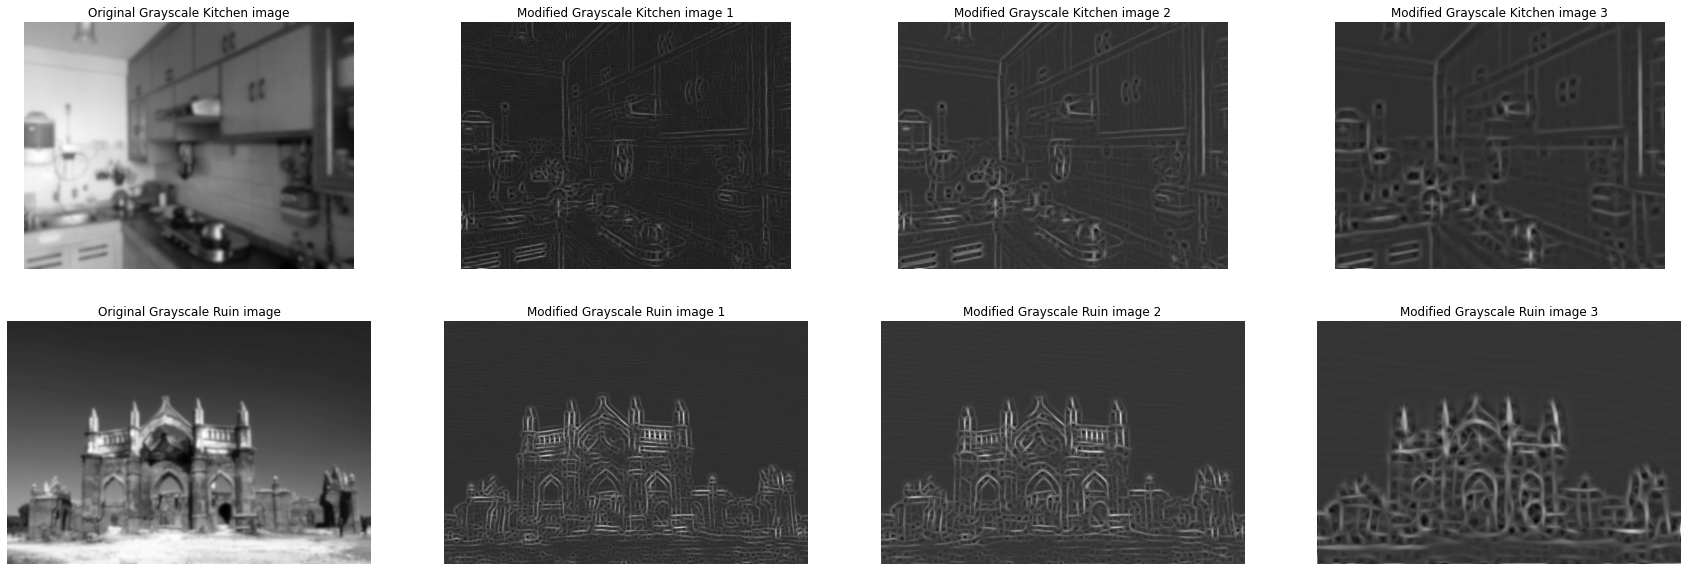

In [ ]:
# function to find the maximum edge at each point/signal value
def getMax(img_0, img_45, img_90, img_135):
  h=img_0.shape[0]
  w=img_0.shape[1]
  for y in range(0, h):
      for x in range(0, w):
        if img_0[y,x] > img_45[y,x] and img_0[y,x] > img_90[y,x] and img_0[y,x] >img_135[y,x]:
          img_0[y,x]=img_0[y,x]
        elif img_45[y,x] > img_90[y,x] and img_45[y,x] > img_135[y,x]: 
          img_0[y,x]=img_45[y,x]
        elif img_90[y,x] > img_135[y,x]:
          img_0[y,x]=img_90[y,x]
        else:
          img_0[y,x]=img_135[y,x]

  return img_0


#finding the normalizing factor (i.e. average) of the edge images for 3 dog edge oriented kitchen image cases
knormImg1 = (orien_dog_kitchen_1_0+orien_dog_kitchen_1_45+orien_dog_kitchen_1_90+orien_dog_kitchen_1_135)/4
knormImg2 = (orien_dog_kitchen_2_0+orien_dog_kitchen_2_45+orien_dog_kitchen_2_90+orien_dog_kitchen_2_135)/4
knormImg3 = (orien_dog_kitchen_3_0+orien_dog_kitchen_3_45+orien_dog_kitchen_3_90+orien_dog_kitchen_3_135)/4
#finding the normalizing factor (i.e. average) of the edge images for 3 dog edge oriented ruin image cases
rnormImg1 = (orien_dog_ruin_1_0+orien_dog_ruin_1_45+orien_dog_ruin_1_90+orien_dog_ruin_1_135)/4
rnormImg2 = (orien_dog_ruin_2_0+orien_dog_ruin_2_45+orien_dog_ruin_2_90+orien_dog_ruin_2_135)/4
rnormImg3 = (orien_dog_ruin_3_0+orien_dog_ruin_3_45+orien_dog_ruin_3_90+orien_dog_ruin_3_135)/4

max_kitchen_1 = getMax(orien_dog_kitchen_1_0,orien_dog_kitchen_1_45,orien_dog_kitchen_1_90,orien_dog_kitchen_1_135) #finding the maximum edge at each point/signal value of kitchen dog(1,3)
max_kitchen_2 = getMax(orien_dog_kitchen_2_0,orien_dog_kitchen_2_45,orien_dog_kitchen_2_90,orien_dog_kitchen_2_135) #finding the maximum edge at each point/signal value of kitchen dog(3,8)
max_kitchen_3 = getMax(orien_dog_kitchen_3_0,orien_dog_kitchen_3_45,orien_dog_kitchen_3_90,orien_dog_kitchen_3_135) #finding the maximum edge at each point/signal value of kitchen dog(8,13)

max_ruin_1 = getMax(orien_dog_ruin_1_0,orien_dog_ruin_1_45,orien_dog_ruin_1_90,orien_dog_ruin_1_135) #finding the maximum edge at each point/signal value of ruin dog(1,3)
max_ruin_2 = getMax(orien_dog_ruin_2_0,orien_dog_ruin_2_45,orien_dog_ruin_2_90,orien_dog_ruin_2_135) #finding the maximum edge at each point/signal value of ruin dog(3,8)
max_ruin_3 = getMax(orien_dog_ruin_3_0,orien_dog_ruin_3_45,orien_dog_ruin_3_90,orien_dog_ruin_3_135) #finding the maximum edge at each point/signal value of ruin dog(8,13)

max_kitchen_1 = cv.normalize(max_kitchen_1, knormImg1, 0, 255, cv.NORM_MINMAX) #normalizing the strongest edge image
max_kitchen_2 = cv.normalize(max_kitchen_2, knormImg2, 0, 255, cv.NORM_MINMAX) #normalizing the strongest edge image
max_kitchen_3 = cv.normalize(max_kitchen_3, knormImg3, 0, 255, cv.NORM_MINMAX) #normalizing the strongest edge image

max_ruin_1 = cv.normalize(max_ruin_1, rnormImg1, 0, 255, cv.NORM_MINMAX) #normalizing the strongest edge image
max_ruin_2 = cv.normalize(max_ruin_2, rnormImg2, 0, 255, cv.NORM_MINMAX) #normalizing the strongest edge image
max_ruin_3 = cv.normalize(max_ruin_3, rnormImg3, 0, 255, cv.NORM_MINMAX) #normalizing the strongest edge image


plt.figure(figsize=(30, 10))

plt.subplot(2,4,1)
plt.title('Original Grayscale Kitchen image')
plt.imshow(img, cmap='gray') 
plt.axis('off')

plt.subplot(2,4,2)
plt.title('Modified Grayscale Kitchen image 1')
plt.imshow(max_kitchen_1, 'gray') 
plt.axis('off')

plt.subplot(2,4,3)
plt.title('Modified Grayscale Kitchen image 2')
plt.imshow(max_kitchen_2, 'gray') 
plt.axis('off')

plt.subplot(2,4,4)
plt.title('Modified Grayscale Kitchen image 3')
plt.imshow(max_kitchen_3, 'gray') 
plt.axis('off')

plt.subplot(2,4,5)
plt.title('Original Grayscale Ruin image')
plt.imshow(img2, cmap='gray') 
plt.axis('off')

plt.subplot(2,4,6)
plt.title('Modified Grayscale Ruin image 1')
plt.imshow(max_ruin_1, 'gray') 
plt.axis('off')

plt.subplot(2,4,7)
plt.title('Modified Grayscale Ruin image 2')
plt.imshow(max_ruin_2, 'gray') 
plt.axis('off')

plt.subplot(2,4,8)
plt.title('Modified Grayscale Ruin image 3')
plt.imshow(max_ruin_3, 'gray') 
plt.axis('off')




1.   It is seen in both the image that with low_sigma=1 and high_sigma=3 the final image had many thin edges(Modified Grayscale Ruin Image 1 and Modified Grayscale Kitchen Image 1)

2.   It is seen in both the image that with low_sigma=3 and high_sigma=8 the final image had a medium number of edges with medium thickness (Modified Grayscale Ruin Image 2 and Modified Grayscale Kitchen Image 2)

3.  It is seen in both the image that with low_sigma=8 and high_sigma=13 the final image had fewer edges but where very thick (Modified Grayscale Ruin Image 3 and Modified Grayscale Kitchen Image 3)



